In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from preprocessing import preprocessing, group_features, label_encoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = preprocessing('marketing_campaign.csv')
df = group_features(df)
df = label_encoder(df)
df.head()

2233


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Tenure,Group Income,Group Age,Household Size,Edu Encoded,Marital Encoded,Group Income Encoded,Group Age Encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,39,663,40K–60K,30-40,0,2,4,3,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,42,113,40K–60K,40-50,2,2,4,3,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,31,312,60K–80K,30-40,0,2,5,4,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,12,139,20K–40K,10-20,1,2,5,2,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,15,161,40K–60K,10-20,1,4,3,3,1


In [3]:
df = df.drop(columns=['ID','Year_Birth', 'Education', 'Marital_Status','Kidhome', 'Teenhome', 'Dt_Customer', 'Group Income', 'Group Age', 'Z_CostContact', 'Z_Revenue'])

### Without Grouping

In [4]:
df_no_grouping = df.drop(columns=['Edu Encoded', 'Marital Encoded', 'Group Income Encoded', 'Group Age Encoded'])

### K-Mean Clustering

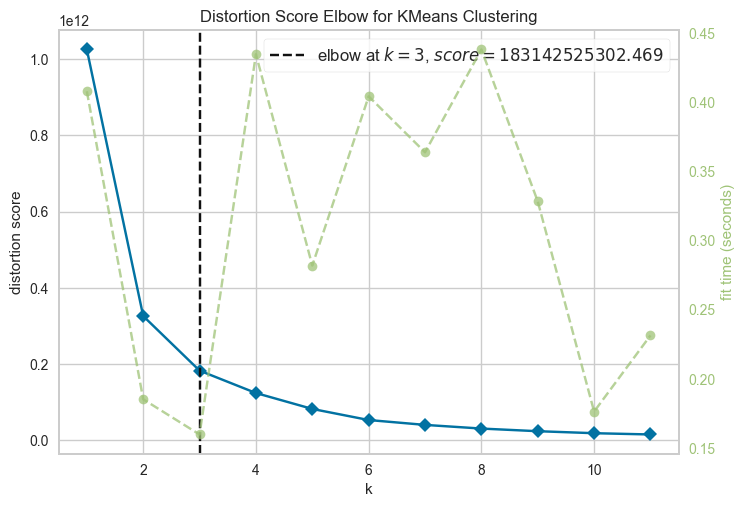

In [5]:
model_no_grouping = KMeans(random_state=42,init='k-means++',n_init=10)
visualizer_no_grouping = KElbowVisualizer(model_no_grouping, k=(1,12))

visualizer_no_grouping.fit(df_no_grouping.values)
visualizer_no_grouping.show()

optimal_k_no_grouping = visualizer_no_grouping.elbow_value_

In [6]:
optimal_k_no_grouping = visualizer_no_grouping.elbow_value_
final_kmeans = KMeans(n_clusters=optimal_k_no_grouping, random_state=42, init='k-means++', n_init=10)
cluster_labels = final_kmeans.fit_predict(df_no_grouping.values)
df_no_grouping_clustered = df_no_grouping.copy()
df_no_grouping_clustered['Cluster'] = cluster_labels
cluster_profile = df_no_grouping_clustered.groupby('Cluster').mean()
print(cluster_profile)

               Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        28369.243935  48.521563   30.625337   5.985175        25.582210   
1        76958.275510  49.036443  615.760933  56.724490       397.418367   
2        52396.713433  49.730198  290.709158  19.058168       101.193069   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0               9.063342          6.043127     17.730458           2.142857   
1              82.839650         60.195335     69.950437           1.610787   
2              25.220297         18.284653     46.044554           3.101485   

         NumWebPurchases  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                   ...                                             
0               2.159030  ...      0.084906      0.004043      0.000000  

### Cluster Demonstration

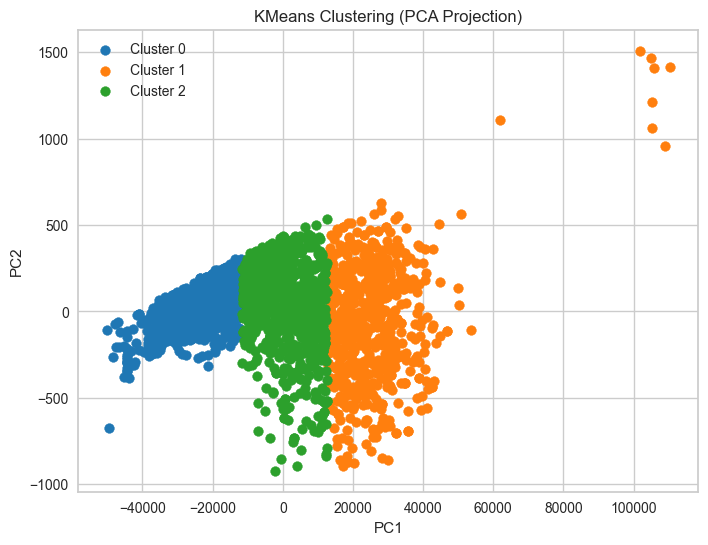

In [7]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_no_grouping.values)

unique_clusters = np.unique(cluster_labels)
colors = plt.get_cmap('tab10')

plt.figure(figsize=(8,6))
for cluster in unique_clusters:
    cluster_points = reduced_data[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],label=f'Cluster {cluster}', color=colors(cluster))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering (PCA Projection)')
plt.legend()
plt.grid(True)
plt.show()

### DBSCAN Clustering

### With grouping

In [8]:
df_grouping = df.drop(columns=['Income', 'Age'])
df_grouping.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure,Household Size,Edu Encoded,Marital Encoded,Group Income Encoded,Group Age Encoded
0,58,635,88,546,172,88,88,3,8,10,...,0,0,0,1,663,0,2,4,3,3
1,38,11,1,6,2,1,6,2,1,1,...,0,0,0,0,113,2,2,4,3,4
2,26,426,49,127,111,21,42,1,8,2,...,0,0,0,0,312,0,2,5,4,3
3,26,11,4,20,10,3,5,2,2,0,...,0,0,0,0,139,1,2,5,2,1
4,94,173,43,118,46,27,15,5,5,3,...,0,0,0,0,161,1,4,3,3,1


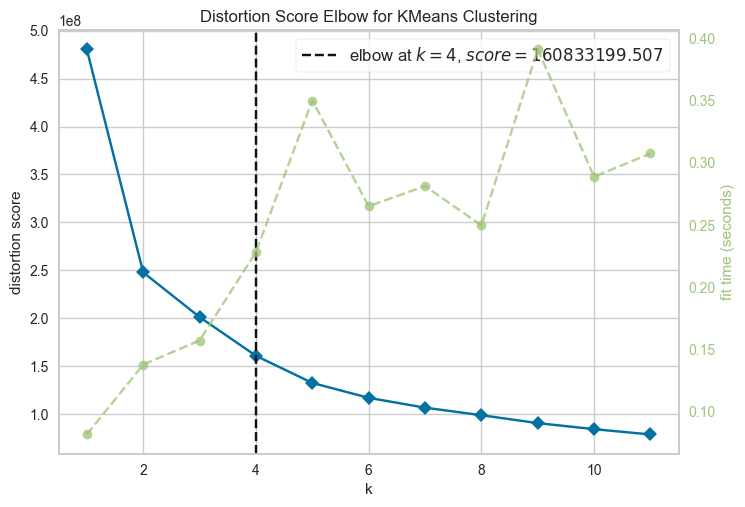

In [9]:
model_grouping = KMeans(random_state=42,init='k-means++',n_init=10)
visualizer_grouping = KElbowVisualizer(model_grouping, k=(1,12))

visualizer_grouping.fit(df_grouping.values)
visualizer_grouping.show()
optimal_k_grouping = visualizer_grouping.elbow_value_

In [10]:
optimal_k_grouping = visualizer_grouping.elbow_value_
final_kmeans_grouping = KMeans(n_clusters=optimal_k_grouping, random_state=42, init='k-means++', n_init=10)
cluster_labels_grouping = final_kmeans_grouping.fit_predict(df_grouping.values)
df_grouping_clustered = df_grouping.copy()
df_grouping_clustered['Cluster'] = cluster_labels_grouping
cluster_profile_grouping = df_grouping_clustered.groupby('Cluster').mean()
print(cluster_profile_grouping)

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        48.445491   84.915209   9.721400        39.309556        13.594886   
1        50.062069  980.431034  49.913793       388.389655        69.555172   
2        49.628466  486.158965  52.452865       362.369686        77.672828   
3        49.036254  105.135952  13.108761        53.614804        17.580060   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                       
0               10.261104     21.071332           2.076716         2.746972   
1               49.806897     73.127586           2.072414         5.934483   
2               55.484288     72.706100           2.234750         5.818854   
3               12.790030     33.457704           2.791541         3.368580   

         NumCatalogPurchases  ...  AcceptedCmp1  A

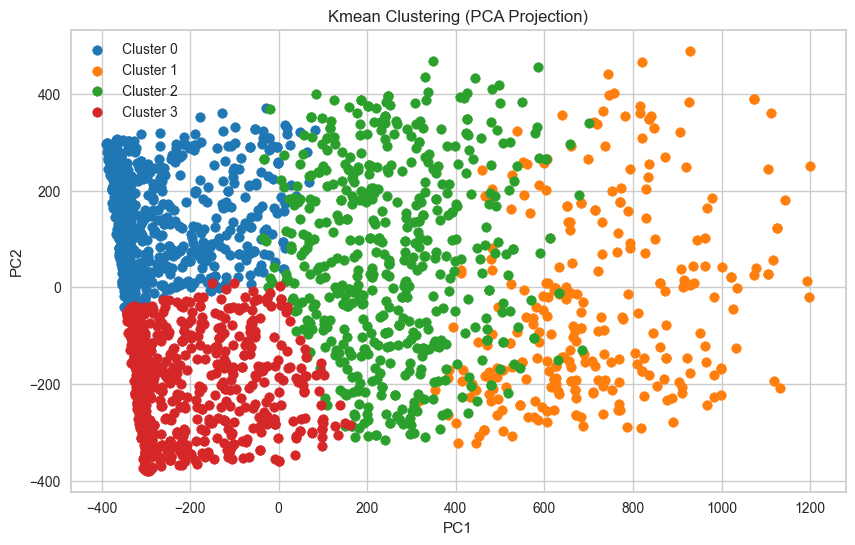

In [11]:
pca = PCA(n_components=3)
reduced_data_grouping = pca.fit_transform(df_grouping.values)
unique_clusters = np.unique(cluster_labels_grouping)
colors = plt.get_cmap('tab10')

plt.figure(figsize=(10,6))
for cluster in unique_clusters:
    cluster_points_grouping = reduced_data_grouping[cluster_labels_grouping == cluster]
    plt.scatter(cluster_points_grouping[:, 0], cluster_points_grouping[:, 1], label=f'Cluster {cluster}', color=colors(cluster))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kmean Clustering (PCA Projection)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
df_grouping_clustered[['Tenure', 'Household Size', 'Edu Encoded','Marital Encoded', 'Group Income Encoded', 'Group Age Encoded','Cluster']]

,Tenure,Household Size,Edu Encoded,Marital Encoded,Group Income Encoded,Group Age Encoded,Cluster
0,663,0,2,4,3,3,2
1,113,2,2,4,3,4,0
2,312,0,2,5,4,3,2
3,139,1,2,5,2,1,0
4,161,1,4,3,3,1,0
...,...,...,...,...,...,...,...
2235,381,1,2,3,4,2,2
2236,19,3,4,5,4,4,0
2237,155,0,2,2,3,1,1
2238,156,1,3,5,4,3,2


In [17]:
df = preprocessing('marketing_campaign.csv')
df = group_features(df)
df['Cluster'] = cluster_labels_grouping

2233


In [20]:
df = df.drop(columns=['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome'])

In [22]:
df = df.drop(columns=['Complain', 'Z_CostContact', 'Z_Revenue'])

In [38]:
df_1 = df[['Education', 'Marital_Status', 'Tenure', 'Group Income','Group Age', 'Household Size', 'Cluster']]
df_1[df_1['Cluster']==0].head()

,Education,Marital_Status,Tenure,Group Income,Group Age,Household Size,Cluster
1,Graduation,Single,113,40K–60K,40-50,2,0
3,Graduation,Together,139,20K–40K,10-20,1,0
4,PhD,Married,161,40K–60K,10-20,1,0
9,PhD,Together,108,20K,40-50,2,0
10,Graduation,Married,226,40K–60K,10-20,1,0


In [39]:
df_1[df_1['Cluster']==1].head()

,Education,Marital_Status,Tenure,Group Income,Group Age,Household Size,Cluster
15,PhD,Single,582,80K-100k,40-50,0,1
18,Master,Married,458,60K–80K,40-50,1,1
22,PhD,Married,553,40K–60K,40-50,1,1
49,PhD,Married,598,60K–80K,40-50,2,1
51,Master,Married,687,60K–80K,30-40,0,1


In [40]:
df_1[df_1['Cluster']==2].head()

,Education,Marital_Status,Tenure,Group Income,Group Age,Household Size,Cluster
0,Graduation,Single,663,40K–60K,30-40,0,2
2,Graduation,Together,312,60K–80K,30-40,0,2
5,Master,Together,293,60K–80K,20-30,1,2
12,Graduation,Divorced,226,60K–80K,30-40,0,2
21,Graduation,Married,539,20K,10-20,1,2


In [41]:
df_1[df_1['Cluster']==3].head()

,Education,Marital_Status,Tenure,Group Income,Group Age,Household Size,Cluster
6,Graduation,Divorced,593,40K–60K,20-30,1,3
7,PhD,Married,417,20K–40K,10-20,1,3
8,PhD,Together,388,20K–40K,20-30,1,3
11,Basic,Married,593,20K,10-20,0,3
14,Graduation,Married,627,20K,10,0,3


In [44]:
import pickle
with open('cluster_grouped.pkl', 'wb') as file:
    pickle.dump(df_grouping_clustered, file)